# Examining Storms using Extreme Value Theory

Our module implements the `TropicalCycloneExtremes` class which allows users to:

- Use the `fetch` methd to download storm data from HURDAT2 and IBTrACS using the `tropycal` module.
- Use the `fit` method to fit the storm data to a Generalized Extreme Value (GEV) distribution.
- Use the `evaluate` method to evaluate the fit of the data to the GEV distribution.
- Use the `plot` method to plot the actual data and the fitted distribution.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Import module from parent folder
sys.path.append("../")
from tc_extremes import *

In [2]:
# Initialize the class
storms = TCExtremes()

## Analyzing Maximum Wind Speeds in the North Atlantic

### Fetching Data

In [3]:
# Fetch data for North Atlantic basin, saved as `storm_data` class attribute
storm_data = storms.fetch(start_year=None, end_year=2023, ocean_basin='north_atlantic')
display(storms.storm_data)

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (1.95 seconds)


,season,type,vmax,mslp,basin,source
stormid,,,,,,
AL011851,1851,HU,80.0,NaN,north_atlantic,hurdat
AL011852,1852,TS,100.0,961.0,north_atlantic,hurdat
AL011853,1853,TS,50.0,NaN,north_atlantic,hurdat
AL011854,1854,TS,70.0,NaN,north_atlantic,hurdat
AL011855,1855,HU,90.0,NaN,north_atlantic,hurdat
...,...,...,...,...,...,...
AL301969,1969,TD,30.0,NaN,north_atlantic,hurdat
AL302005,2005,TS,75.0,981.0,north_atlantic,hurdat
AL302020,2020,SS,60.0,987.0,north_atlantic,hurdat


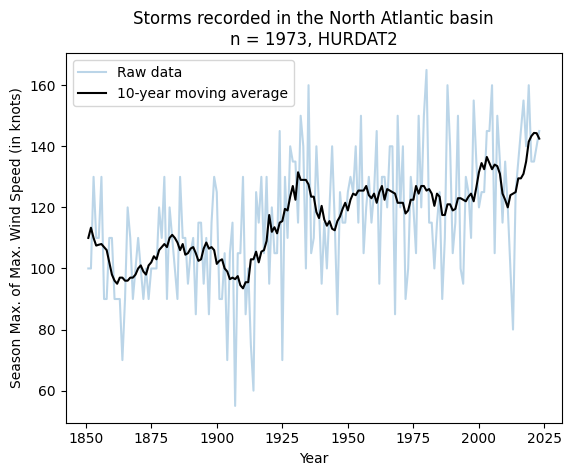

<Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 1973, HURDAT2'}, xlabel='Year', ylabel='Season Max. of Max. Wind Speed (in knots)'>

In [4]:
# Examine average across time
storms.plot_agg(variable='vmax',window=10,min_periods=5)

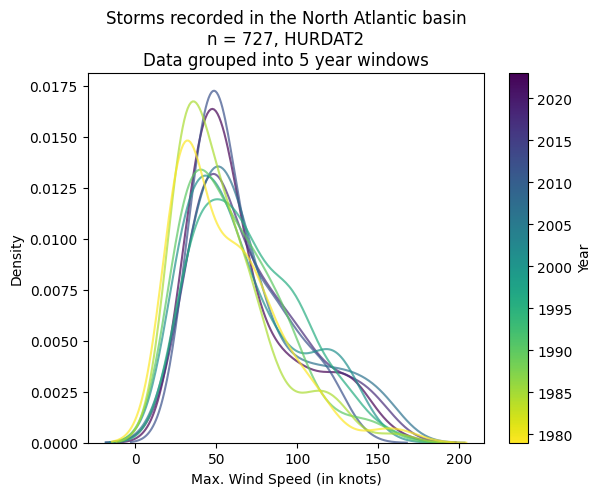

<Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 727, HURDAT2\nData grouped into 5 year windows'}, xlabel='Max. Wind Speed (in knots)', ylabel='Density'>

In [5]:
storms.plot_dist(storm_data[storm_data['season']>=1979], variable='vmax',window=5)

### Fit to Entire Dataset

In [6]:
# Fit the data to the entire dataset, passing `method = 'all'`, saved as `ev_params_` class attribute
storms.fit(variable='vmax', fit_window=0)
display(pd.DataFrame(storms.ev_params_).transpose().rename({0:'shape',1:'loc',2:'scale'},axis=1))

,shape,loc,scale
0,-0.009732,53.803079,23.235242


[  0. 190.]


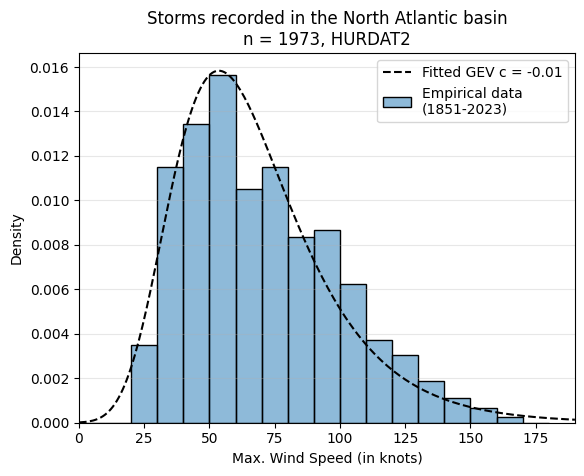

<Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 1973, HURDAT2'}, xlabel='Max. Wind Speed (in knots)', ylabel='Density'>

In [7]:
# Plot data and fit for entire dataset previously fetched
storms.plot_fit()

In [8]:
# Evaluate the fit of the data using the 'all' method
ev_params = storms.fit(variable='vmax', fit_window=0)
evaluation_results_all = storms.evaluate(variable='vmax')

print("Empirical probabilities (all):", evaluation_results_all['empirical_probs'])
print("GEV probabilities (all):", evaluation_results_all['gev_probs'])

Empirical probabilities (all): [0.01773948 0.01773948 0.01773948 ... 0.99873289 0.99873289 1.        ]
GEV probabilities (all): [0.03079294 0.03079294 0.03079294 ... 0.98863805 0.98863805 0.99074179]


In [9]:
# Score the fit with the KS statistic
ks_res = storms.score()
ks_stats = [ks_res.statistic, ks_res.statistic_location, ks_res.pvalue, ks_res.statistic_sign]
ks_stats = pd.DataFrame(ks_stats).transpose().rename({0:'statistic',1:'stat_loc',2:'p_value', 3:'sign'},axis=1)
ks_stats

,statistic,stat_loc,p_value,sign
0,0.079837,50.0,2.190061e-11,1.0


### Fit to Individual Seasons

In [10]:
# Fit the data to each season dataset, passing `method = 'all'`, saved as `ev_params_` class attribute
storms.fit(variable='vmax', fit_window=5)
res = pd.DataFrame(storms.ev_params_).transpose().rename({0:'shape',1:'loc',2:'scale'},axis=1)
display(res.iloc[:20,:])

,,shape,loc,scale
2019,2024,-0.318914,48.837615,1.821544e+01
2014,2019,-0.204767,53.698346,2.235532e+01
2009,2014,-0.166384,50.757652,1.820461e+01
2004,2009,-0.260896,52.392016,2.212539e+01
1999,2004,-0.319411,46.376528,2.064361e+01
1994,1999,-0.038553,54.898377,2.395348e+01
1989,1994,-0.202249,44.980120,1.987667e+01
1984,1989,-0.703830,36.439650,1.214897e+01
1979,1984,-0.862178,35.081397,1.241231e+01
1974,1979,-9.197215,26.782793,1.639673e+01


In [11]:
# Score the fit with the KS statistic
ks_all = storms.score()
ks_stats = {season: [ks_res.statistic, ks_res.statistic_location, ks_res.pvalue, ks_res.statistic_sign] for season, ks_res in ks_all.items()}
ks_stats = pd.DataFrame(ks_stats).transpose().rename({0:'statistic',1:'stat_loc',2:'p_value', 3:'sign'},axis=1)
ks_stats.iloc[-20:]

,,statistic,stat_loc,p_value,sign
1944,1949,0.105347,50.0,0.574484,1.0
1939,1944,0.173895,85.0,0.139784,-1.0
1934,1939,0.109578,85.0,0.456953,-1.0
1929,1934,0.110716,110.0,0.465521,-1.0
1924,1929,0.120724,90.0,0.563338,-1.0
1919,1924,0.113891,70.0,0.774492,-1.0
1914,1919,0.141229,65.0,0.501517,1.0
1909,1914,0.155840,45.0,0.312895,1.0
1904,1909,0.174846,45.0,0.184724,1.0
1899,1904,0.125765,50.0,0.439230,1.0


[  0. 190.]


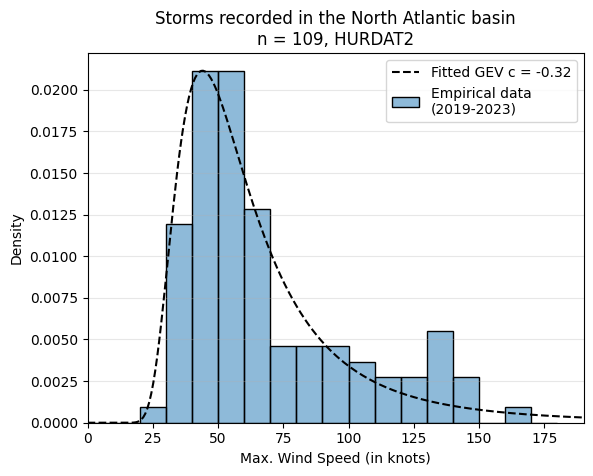

[  0. 180.]


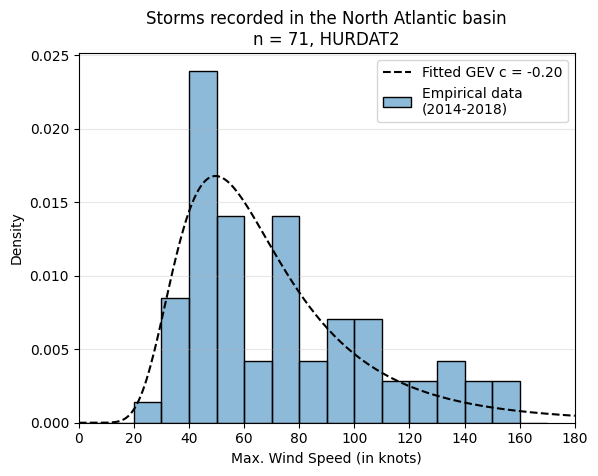

[  0. 160.]


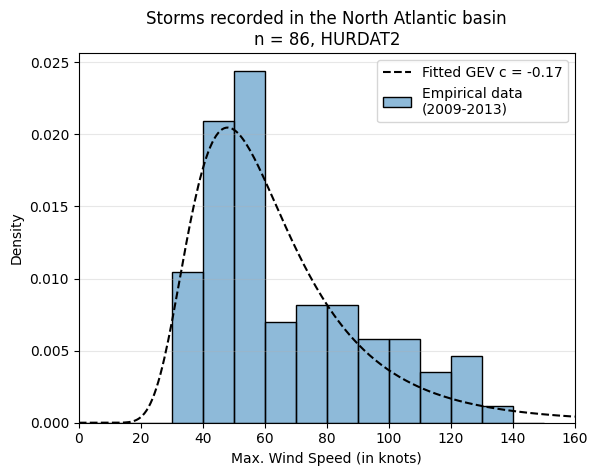

[  0. 190.]


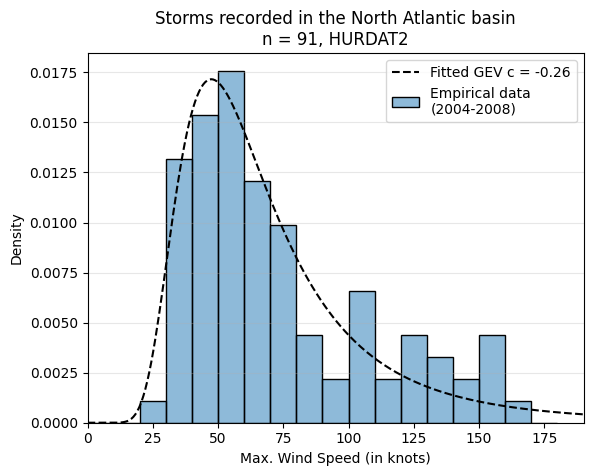

[  0. 170.]


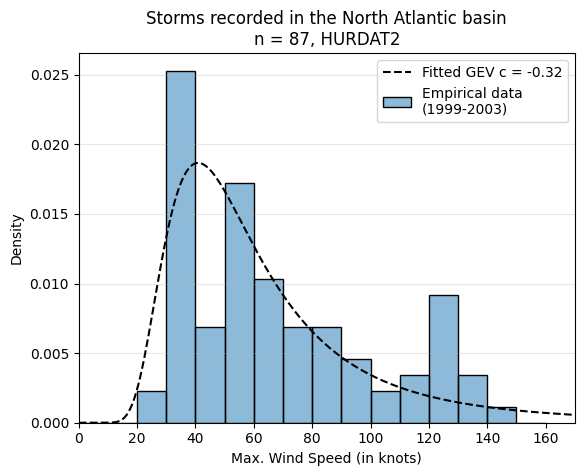

[  0. 180.]


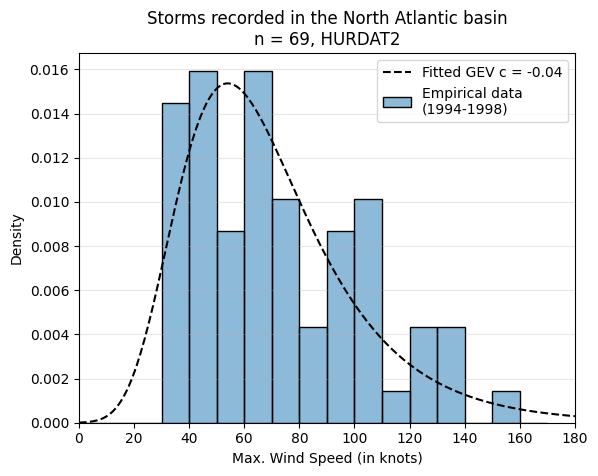

[  0. 170.]


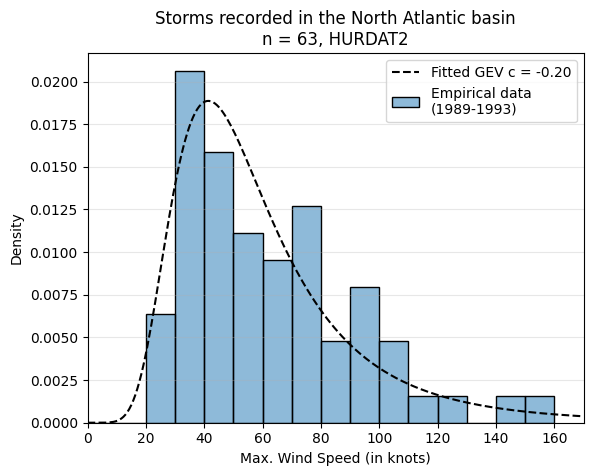

[  0. 180.]


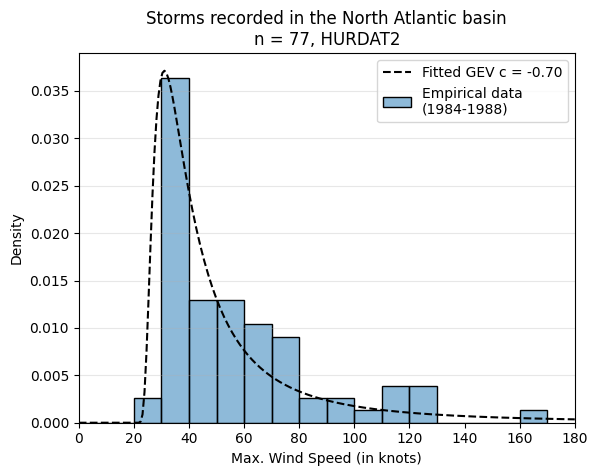

[  0. 190.]


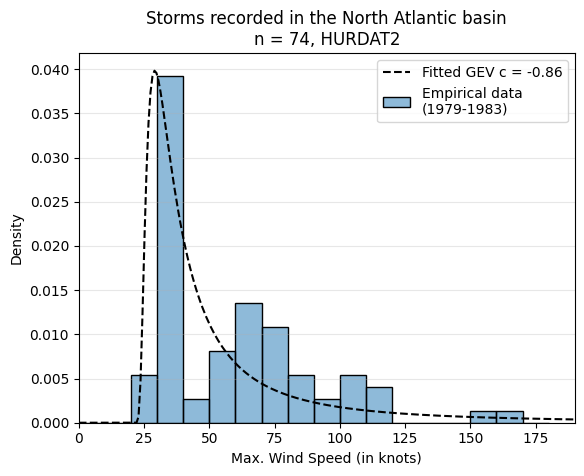

[<Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 109, HURDAT2'}, xlabel='Max. Wind Speed (in knots)', ylabel='Density'>,
 <Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 71, HURDAT2'}, xlabel='Max. Wind Speed (in knots)', ylabel='Density'>,
 <Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 86, HURDAT2'}, xlabel='Max. Wind Speed (in knots)', ylabel='Density'>,
 <Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 91, HURDAT2'}, xlabel='Max. Wind Speed (in knots)', ylabel='Density'>,
 <Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 87, HURDAT2'}, xlabel='Max. Wind Speed (in knots)', ylabel='Density'>,
 <Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 69, HURDAT2'}, xlabel='Max. Wind Speed (in knots)', ylabel='Density'>,
 <Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 63, HURDAT2'}, xlabel='Max. Wind Speed (in knots

In [12]:
# Plot data and fit for entire dataset previously fetched
ev_params = {k:v for k,v in storms.ev_params_.items() if k[0] >= 1979}
storms.plot_fit(storm_data[storm_data['season'] >= 1979], 'vmax', ev_params)

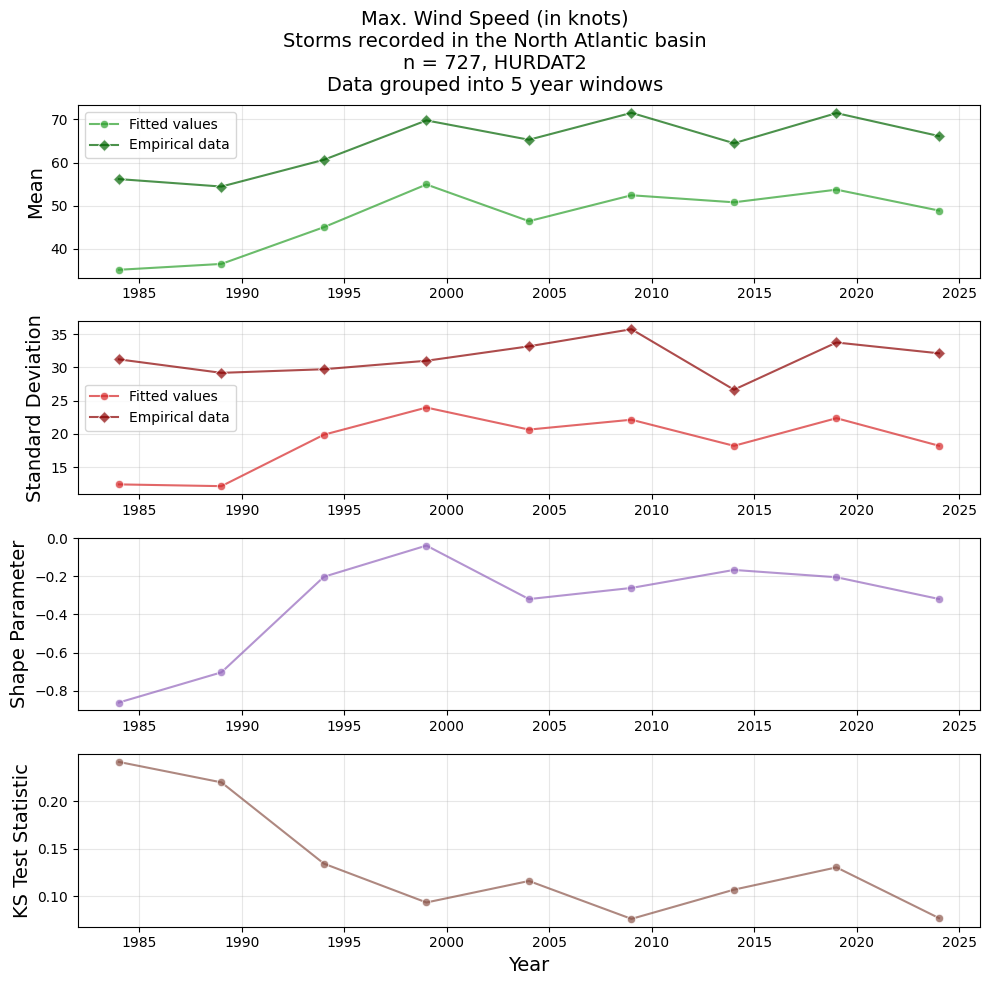

[<Axes: ylabel='Mean'>,
 <Axes: ylabel='Standard Deviation'>,
 <Axes: ylabel='Shape Parameter'>,
 <Axes: xlabel='Year', ylabel='KS Test Statistic'>]

In [13]:
storms.plot_time(storm_data=storm_data[storm_data['season']>=1979],
                 variable='vmax',
                 ev_params=ev_params)

In [14]:
# Evaluate using the seasonally fitted parameters
evaluation_results_season = storms.evaluate(variable='vmax')

# Display results for each season
for season, results in evaluation_results_season.items():
    print(f"Season {season} - Empirical probabilities:", results['empirical_probs'])
    print(f"Season {season} - GEV probabilities:", results['gev_probs'])

Season (2019, 2024) - Empirical probabilities: [0.00917431 0.03669725 0.03669725 0.03669725 0.03669725 0.03669725
 0.09633028 0.09633028 0.09633028 0.09633028 0.09633028 0.09633028
 0.09633028 0.09633028 0.19724771 0.19724771 0.19724771 0.19724771
 0.19724771 0.19724771 0.19724771 0.19724771 0.19724771 0.19724771
 0.19724771 0.19724771 0.19724771 0.19724771 0.30275229 0.30275229
 0.30275229 0.30275229 0.30275229 0.30275229 0.30275229 0.30275229
 0.30275229 0.40825688 0.40825688 0.40825688 0.40825688 0.40825688
 0.40825688 0.40825688 0.40825688 0.40825688 0.40825688 0.40825688
 0.40825688 0.40825688 0.40825688 0.51376147 0.51376147 0.51376147
 0.51376147 0.51376147 0.51376147 0.51376147 0.51376147 0.51376147
 0.58256881 0.58256881 0.58256881 0.58256881 0.58256881 0.58256881
 0.64678899 0.64678899 0.64678899 0.64678899 0.64678899 0.64678899
 0.64678899 0.64678899 0.68807339 0.71100917 0.71100917 0.71100917
 0.71100917 0.74770642 0.74770642 0.74770642 0.74770642 0.7706422
 0.78440367 0.78

## Analyzing Minimum Central Pressure in the North Atlantic

### Fetching Data

In [15]:
storms.fetch(ocean_basin='north_atlantic')

,season,type,vmax,mslp,basin,source
stormid,,,,,,
AL011851,1851,HU,80.0,NaN,north_atlantic,hurdat
AL011852,1852,TS,100.0,961.0,north_atlantic,hurdat
AL011853,1853,TS,50.0,NaN,north_atlantic,hurdat
AL011854,1854,TS,70.0,NaN,north_atlantic,hurdat
AL011855,1855,HU,90.0,NaN,north_atlantic,hurdat
...,...,...,...,...,...,...
AL301969,1969,TD,30.0,NaN,north_atlantic,hurdat
AL302005,2005,TS,75.0,981.0,north_atlantic,hurdat
AL302020,2020,SS,60.0,987.0,north_atlantic,hurdat


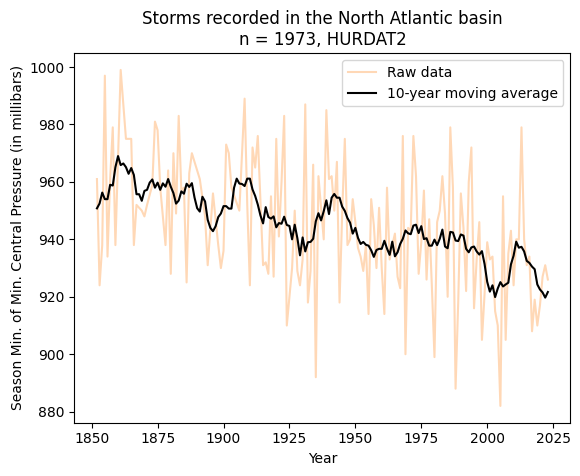

<Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 1973, HURDAT2'}, xlabel='Year', ylabel='Season Min. of Min. Central Pressure (in millibars)'>

In [16]:
storms.plot_agg(variable='mslp',window=10,min_periods=5)

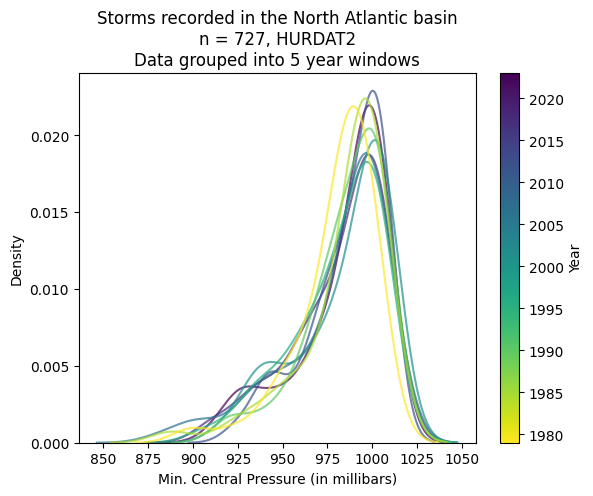

<Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 727, HURDAT2\nData grouped into 5 year windows'}, xlabel='Min. Central Pressure (in millibars)', ylabel='Density'>

In [17]:
storms.plot_dist(storm_data[storm_data['season']>=1979], variable='mslp',window=5)


### Fit to Entire Dataset

[ 850. 1040.]


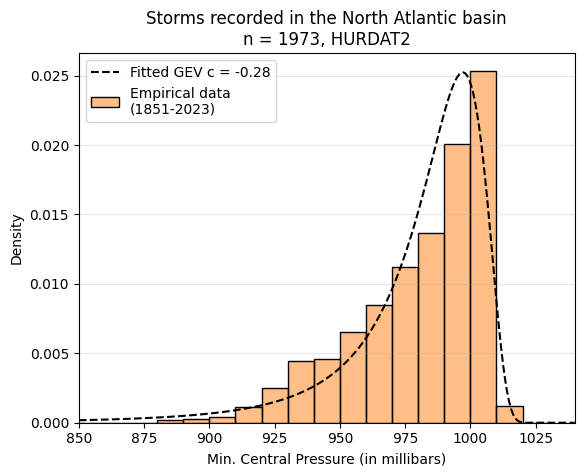

<Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 1973, HURDAT2'}, xlabel='Min. Central Pressure (in millibars)', ylabel='Density'>

In [18]:
storms.fit(variable='mslp', fit_window=0)
storms.plot_fit(variable='mslp')

In [19]:
# Evaluate the fit of the data using the 'all' method
evaluation_results_all = storms.evaluate(variable='mslp')

print("Empirical probabilities (all):", evaluation_results_all['empirical_probs'])
print("GEV probabilities (all):", evaluation_results_all['gev_probs'])

Empirical probabilities (all): [8.23045267e-04 1.64609053e-03 2.46913580e-03 ... 9.98765432e-01
 9.98765432e-01 1.00000000e+00]
GEV probabilities (all): [0.         0.         0.         ... 0.73889114 0.73889114 0.74917451]


In [20]:
# Score the fit with the KS statistic
ks_res = storms.score(variable='mslp')
print(f'KS statistic = {ks_res.statistic:.5f}')
print(f'KS statistic location = {ks_res.statistic_location:,.2f}')
print(f'p-value = {ks_res.pvalue:.5f}')

KS statistic = 0.06098
KS statistic location = 1,000.00
p-value = 0.00023


### Fit to Individual Seasons

In [21]:
# Fit the data to each season dataset, passing `method = 'all'`, saved as `ev_params_` class attribute
storms.fit(variable='mslp', fit_window=5)
res = pd.DataFrame(storms.ev_params_).transpose().rename({0:'shape',1:'loc',2:'scale'},axis=1)
display(res.iloc[-20:])

,,shape,loc,scale
1944,1949,0.025355,985.341829,18.559949
1939,1944,0.100330,989.251176,14.303251
1934,1939,-0.412449,995.227474,12.645987
1929,1934,0.542463,966.407546,29.280503
1924,1929,0.303627,967.341672,25.015208
1919,1924,-0.070514,988.145881,17.318279
1914,1919,0.374438,974.675475,24.957304
1909,1914,0.270244,976.416850,22.231456
1904,1909,1.231720,966.189211,19.940572
1899,1904,0.079000,970.240270,17.264020


In [22]:
# Score the fit with the KS statistic
ks_all = storms.score(variable='mslp')
ks_stats = {season: [ks_res.statistic, ks_res.statistic_location, ks_res.pvalue, ks_res.statistic_sign] for season, ks_res in ks_all.items()}
ks_stats = pd.DataFrame(ks_stats).transpose().rename({0:'statistic',1:'stat_loc',2:'p_value', 3:'sign'},axis=1)
ks_stats.iloc[:20]

,,statistic,stat_loc,p_value,sign
2019,2024,0.057436,1003.0,0.844253,1.0
2014,2019,0.081813,981.0,0.697855,-1.0
2009,2014,0.114904,983.0,0.190870,-1.0
2004,2009,0.076555,964.0,0.632290,-1.0
1999,2004,0.082283,1006.0,0.569378,1.0
1994,1999,0.117977,999.0,0.270211,1.0
1989,1994,0.097890,999.0,0.632008,1.0
1984,1989,0.070456,1000.0,0.953917,-1.0
1979,1984,0.075959,986.0,0.953495,-1.0
1974,1979,0.112216,981.0,0.543783,-1.0


[ 880. 1030.]


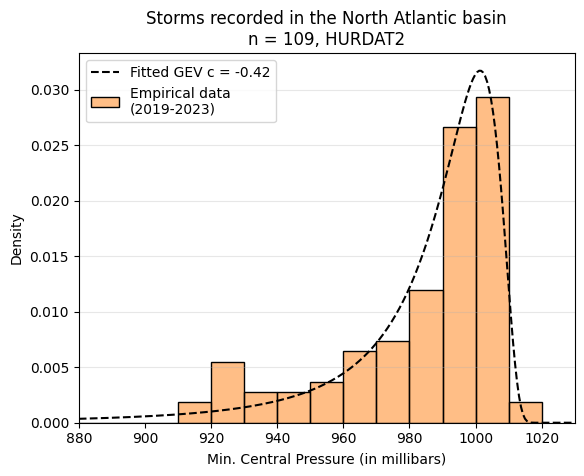

[ 880. 1030.]


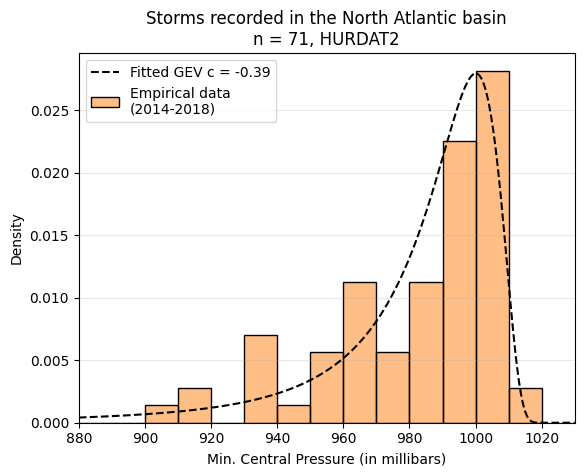

[ 900. 1020.]


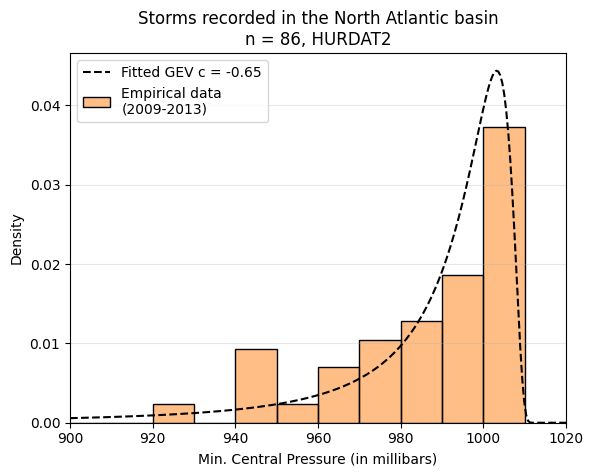

[ 850. 1040.]


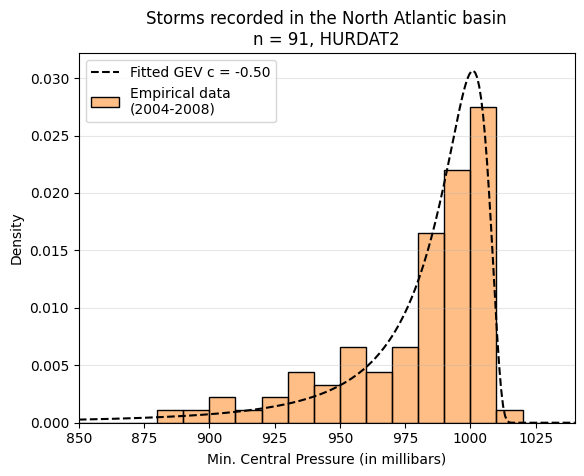

[ 880. 1040.]


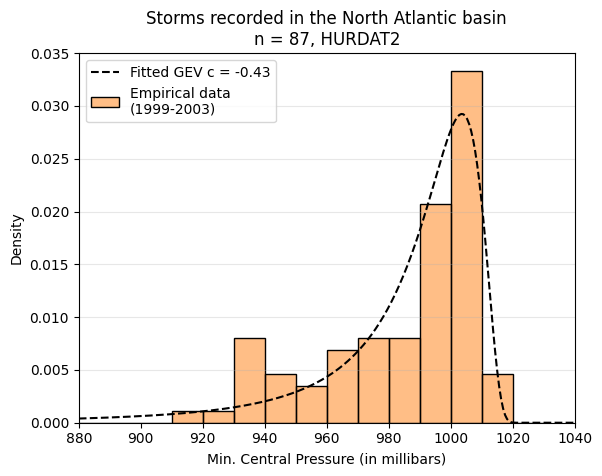

[ 870. 1040.]


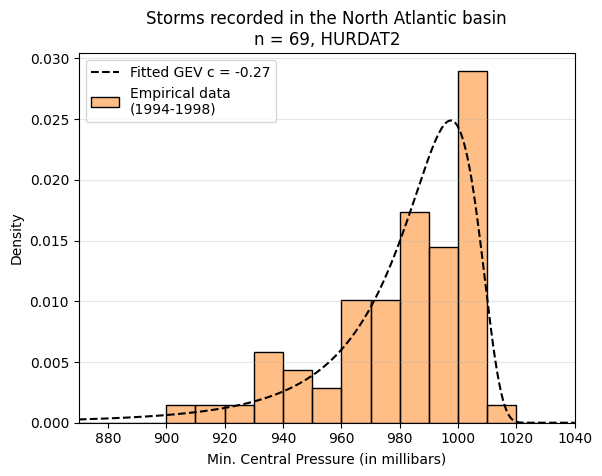

[ 890. 1030.]


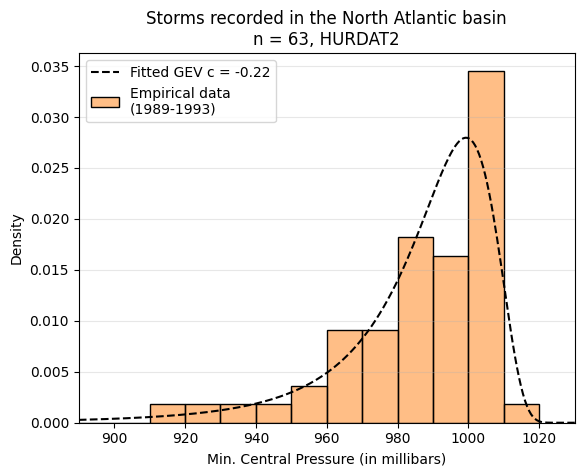

[ 860. 1030.]


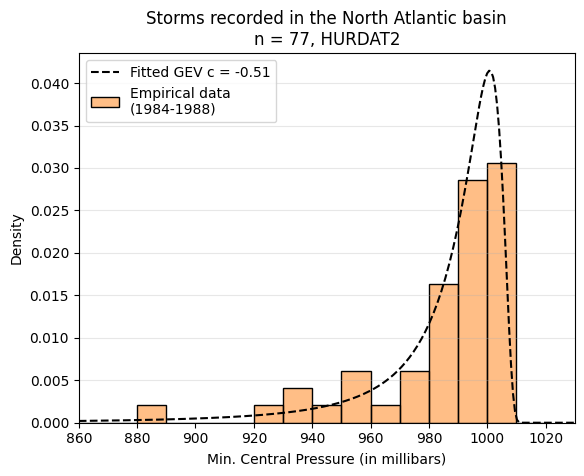

[ 870. 1020.]


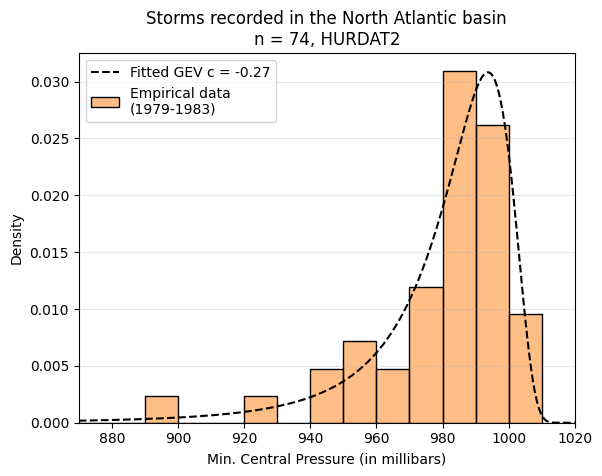

[<Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 109, HURDAT2'}, xlabel='Min. Central Pressure (in millibars)', ylabel='Density'>,
 <Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 71, HURDAT2'}, xlabel='Min. Central Pressure (in millibars)', ylabel='Density'>,
 <Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 86, HURDAT2'}, xlabel='Min. Central Pressure (in millibars)', ylabel='Density'>,
 <Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 91, HURDAT2'}, xlabel='Min. Central Pressure (in millibars)', ylabel='Density'>,
 <Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 87, HURDAT2'}, xlabel='Min. Central Pressure (in millibars)', ylabel='Density'>,
 <Axes: title={'center': 'Storms recorded in the North Atlantic basin\nn = 69, HURDAT2'}, xlabel='Min. Central Pressure (in millibars)', ylabel='Density'>,
 <Axes: title={'center': 'Storms recorded in the North Atlantic

In [23]:
# Plot data and fit for entire dataset previously fetched
ev_params = {k:v for k,v in storms.ev_params_.items() if k[0] >= 1979}
storms.plot_fit(storm_data[storm_data['season'] >= 1979], 'mslp', ev_params)

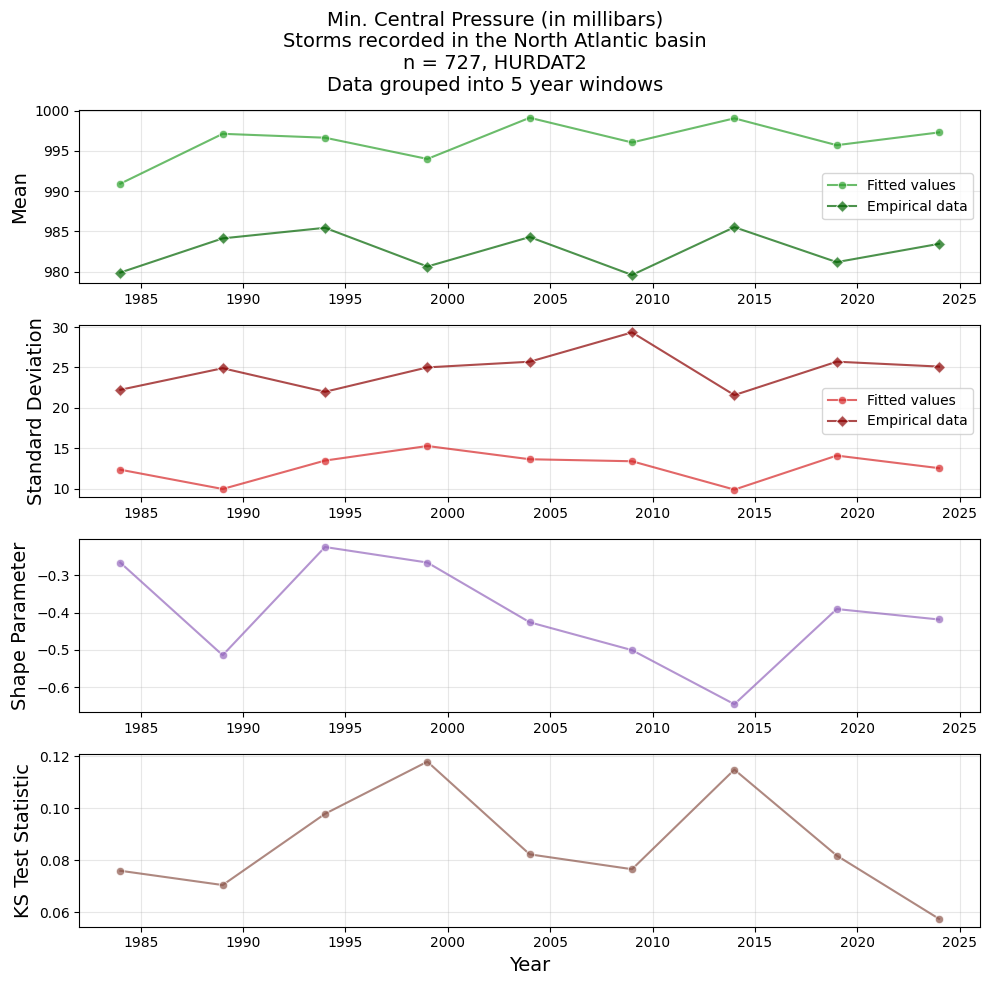

[<Axes: ylabel='Mean'>,
 <Axes: ylabel='Standard Deviation'>,
 <Axes: ylabel='Shape Parameter'>,
 <Axes: xlabel='Year', ylabel='KS Test Statistic'>]

In [24]:
storms.plot_time(storm_data=storm_data[storm_data['season']>=1979],
                 variable='mslp',
                 ev_params=ev_params)

In [25]:
# Evaluate using the seasonally fitted parameters
evaluation_results_season = storms.evaluate(variable='mslp')

# Display results for each season
for season, results in evaluation_results_season.items():
    print(f"Season {season} - Empirical probabilities:", results['empirical_probs'])
    print(f"Season {season} - GEV probabilities:", results['gev_probs'])

Season (2019, 2024) - Empirical probabilities: [0.00917431 0.01834862 0.02752294 0.03669725 0.05045872 0.05045872
 0.06422018 0.0733945  0.08256881 0.09633028 0.09633028 0.11009174
 0.11926606 0.12844037 0.13761468 0.14678899 0.16055046 0.16055046
 0.17431193 0.19724771 0.19724771 0.19724771 0.19724771 0.22018349
 0.2293578  0.23853211 0.24770642 0.25688073 0.26605505 0.27981651
 0.27981651 0.29357798 0.30275229 0.31192661 0.32110092 0.33486239
 0.33486239 0.34862385 0.35779817 0.36697248 0.3853211  0.3853211
 0.3853211  0.40366972 0.41743119 0.41743119 0.43119266 0.45412844
 0.45412844 0.45412844 0.45412844 0.47706422 0.49541284 0.49541284
 0.49541284 0.52293578 0.52293578 0.52293578 0.54587156 0.54587156
 0.5733945  0.5733945  0.5733945  0.5733945  0.60550459 0.60550459
 0.60550459 0.65137615 0.65137615 0.65137615 0.65137615 0.65137615
 0.65137615 0.65137615 0.68807339 0.71100917 0.71100917 0.71100917
 0.71100917 0.73853211 0.73853211 0.75229358 0.77981651 0.77981651
 0.77981651 0.77

# Example Workflow

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (2.03 seconds)


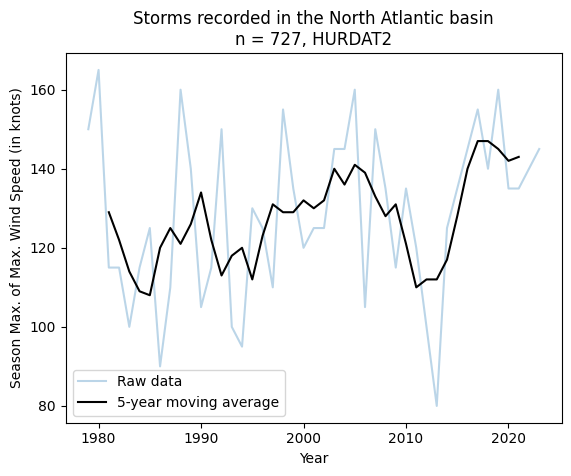

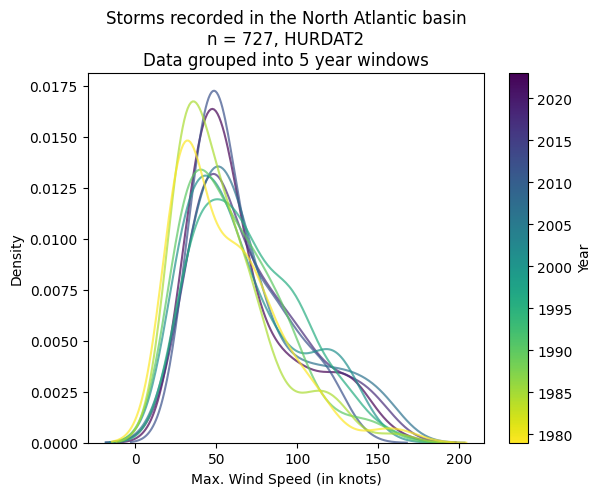

[  0. 190.]


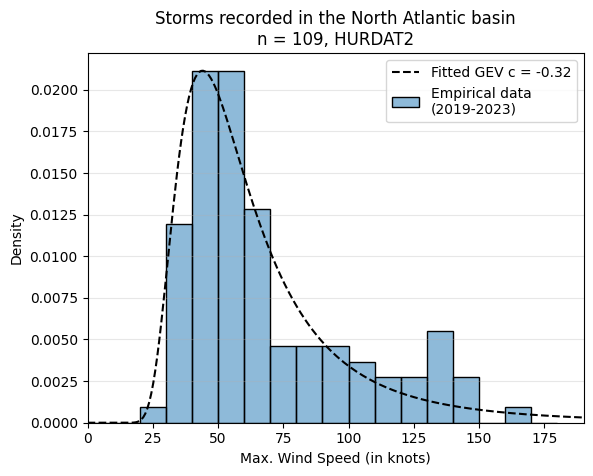

[  0. 180.]


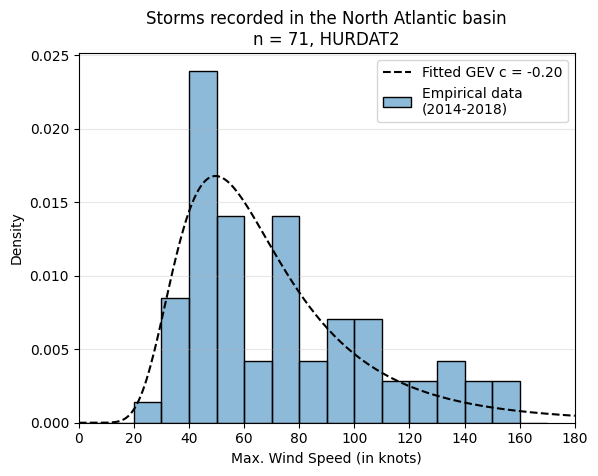

[  0. 160.]


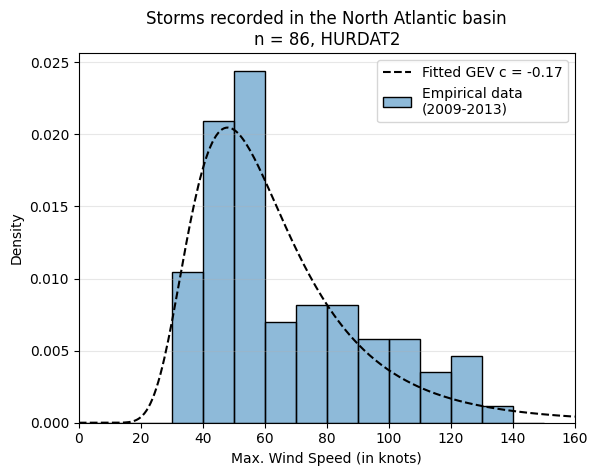

[  0. 190.]


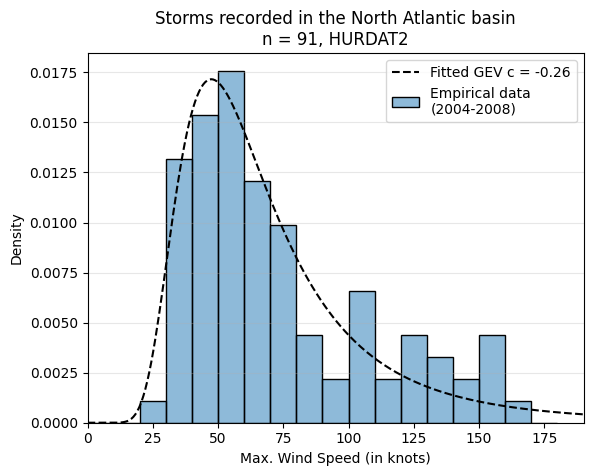

[  0. 170.]


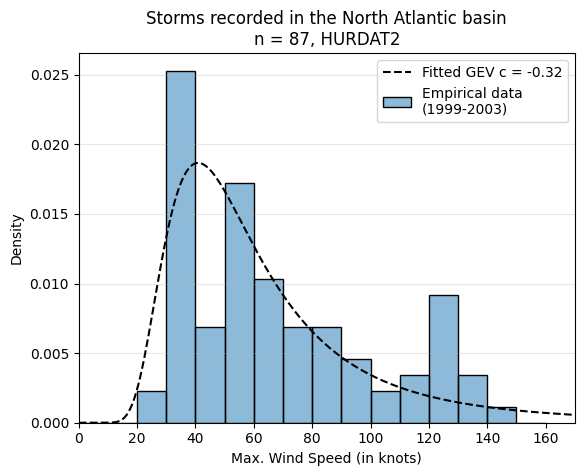

[  0. 180.]


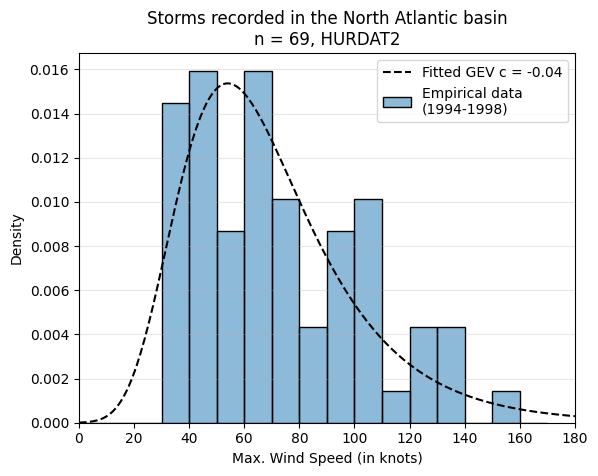

[  0. 170.]


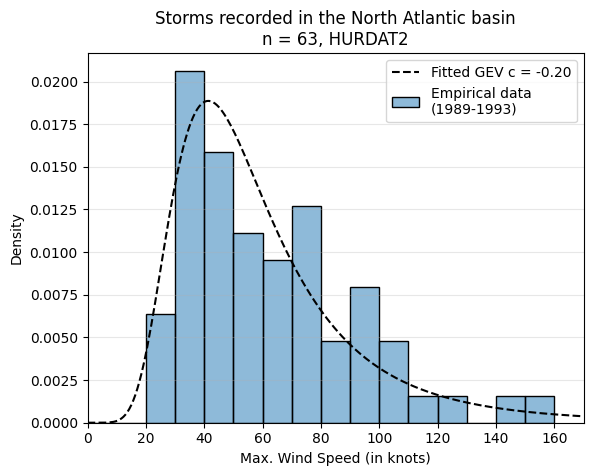

[  0. 180.]


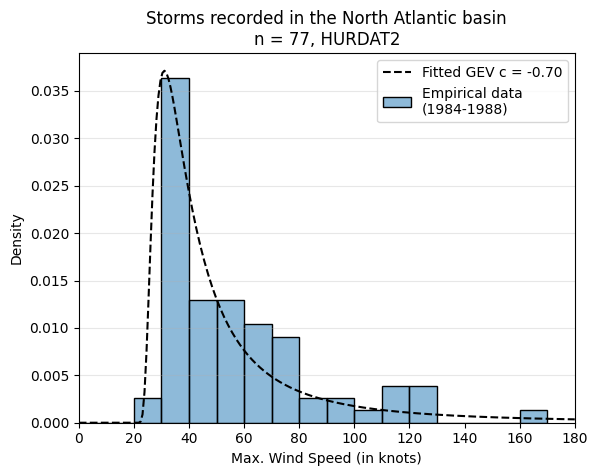

[  0. 190.]


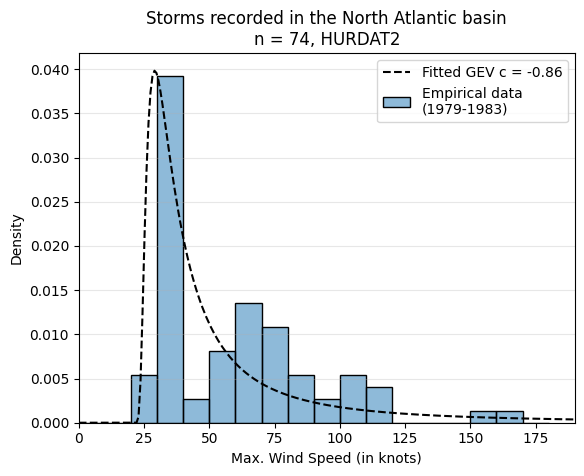

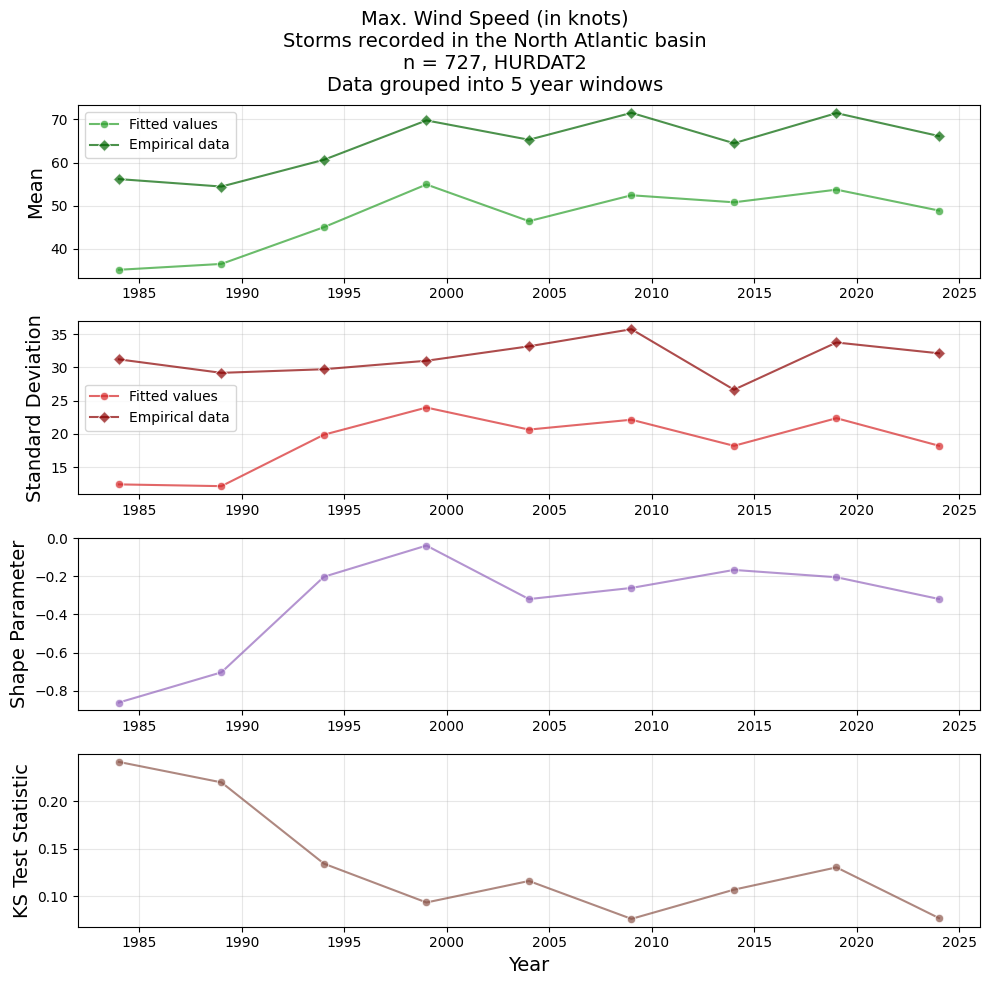

[<Axes: ylabel='Mean'>,
 <Axes: ylabel='Standard Deviation'>,
 <Axes: ylabel='Shape Parameter'>,
 <Axes: xlabel='Year', ylabel='KS Test Statistic'>]

In [28]:
# FETCH DATA:

# Initialize the class
storms = TCExtremes()
# Fetch all available data for the North Atlantic
storm_data = storms.fetch(start_year=1979, end_year=2023, ocean_basin='north_atlantic')

# ANALYZE EMPIRICAL DATA:

# Plot 5-year moving average of maximum wind speeds
storms.plot_agg(variable='vmax', window=5, min_periods=5, plot_path='../../results/vmax_mean.png')
# Plot the distribution of maximum wind speeds in 5-year windows
storms.plot_dist(variable='vmax', window=5, plot_path='../../results/vmax_dist.png')

# FIT GEV DISTRIBUTION TO DATA:

# Fit the GEV distribution to 5-year time windows only for storms after 1979
ev_params = storms.fit(variable='vmax', fit_window=5)
# Plot the fit for all the time windows
storms.plot_fit(variable='vmax', show_plot=True, plot_path='../../results/vmax_fit/')
# Compare differences between theoretical and empirical distribution
eval_results = storms.evaluate(variable='vmax')
# Use KS test statistic to score fit
ks_results = storms.score(variable='vmax')
# Plot the parameters over time
storms.plot_time(variable='vmax', plot_path='../../results/vmax_time.png')